<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [7]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [8]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

For the "Median value of owner-occupied homes" provide a boxplot

Provide a  bar plot for the Charles river variable

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Create a histogram for the pupil to teacher ratio variable

In [9]:
# load dataset
print(boston_df.head())

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  


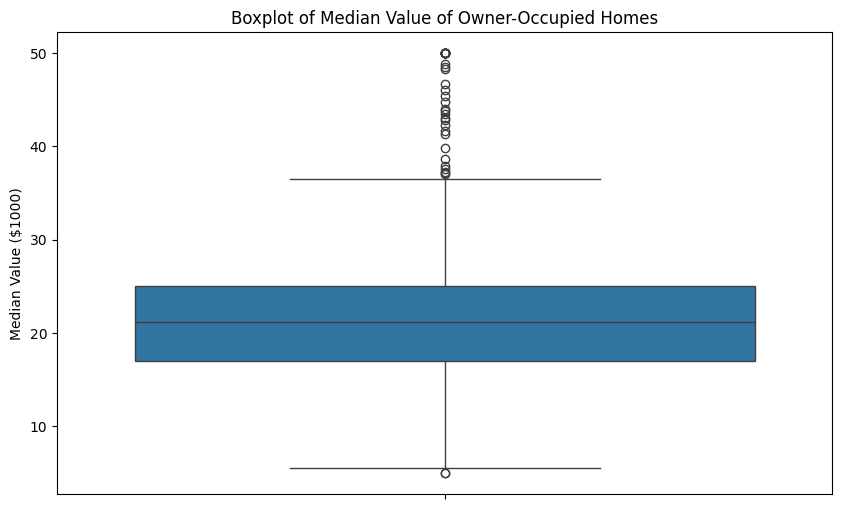

In [10]:
#Boxplot for MEDV
plt.figure(figsize=(10, 6))
sns.boxplot(y='MEDV', data=boston_df)
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value ($1000)')
plt.show()

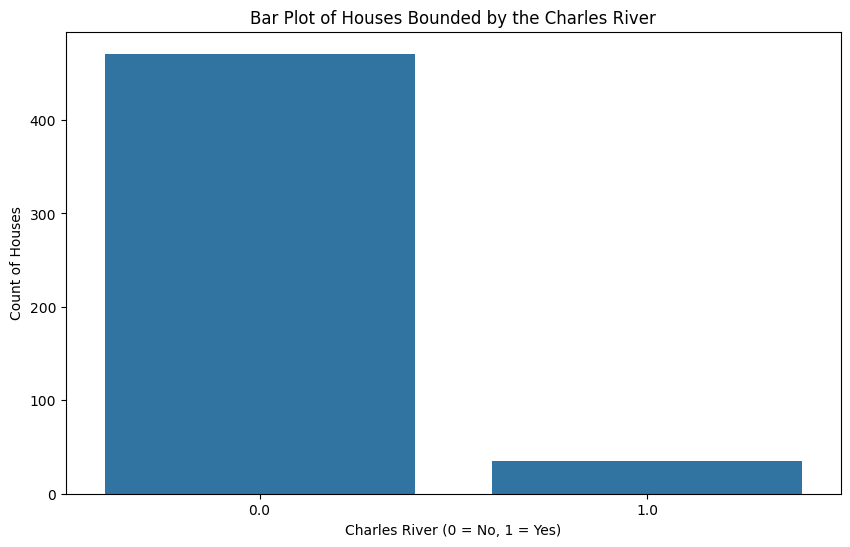

In [11]:
#Bar plot for the Charles River variable (CHAS)
plt.figure(figsize=(10, 6))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Bar Plot of Houses Bounded by the Charles River')
plt.xlabel('Charles River (0 = No, 1 = Yes)')
plt.ylabel('Count of Houses')
plt.show()

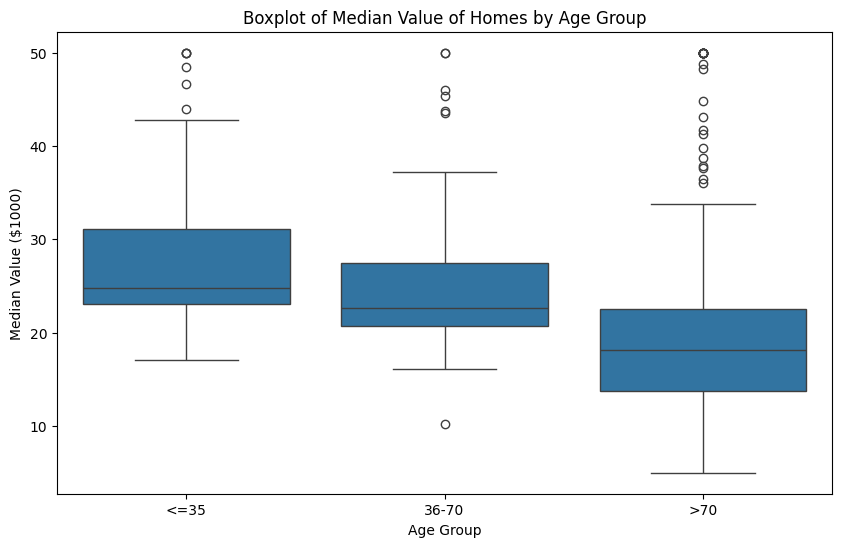

In [12]:
#Boxplot for MEDV vs AGE
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['<=35', '36-70', '>70'])

# Boxplot for MEDV vs AGE_Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
plt.title('Boxplot of Median Value of Homes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value ($1000)')
plt.show()

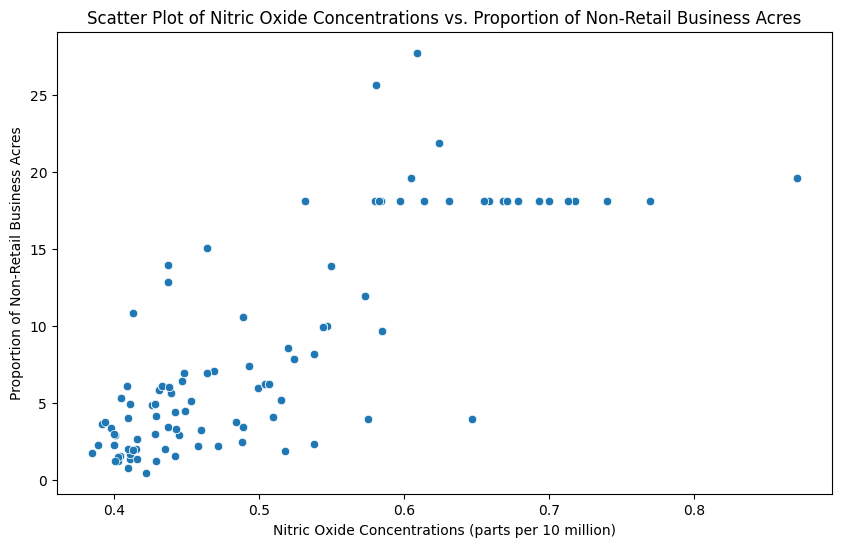

In [16]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Scatter Plot of Nitric Oxide Concentrations vs. Proportion of Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentrations (parts per 10 million)')
plt.ylabel('Proportion of Non-Retail Business Acres')
plt.show()

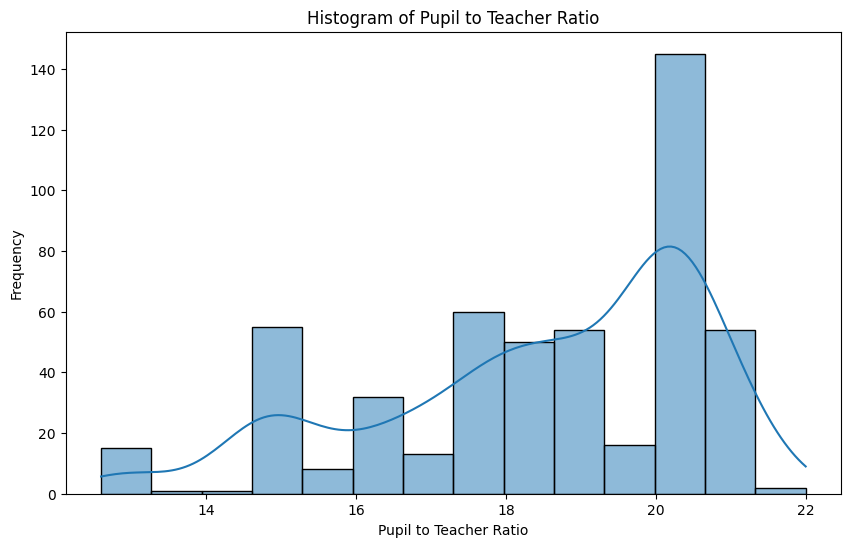

In [15]:
#Create a histogram for the pupil to teacher ratio variable
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], kde=True)
plt.title('Histogram of Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

Task 3 
For each of the following questions;

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [22]:
# Perform T-test
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
t_stat, p_val = scipy.stats.ttest_ind(chas_0, chas_1)

# Print the results
print(f"T-statistic is: {t_stat}, P-value is: {p_val}")

# Conclusion
alpha = 0.05

if p_val < alpha:
    print("Reject H0: There is a significant difference in the median value of houses bounded by the Charles river.")
else:
    print("Fail to reject H0: There is no significant difference in the median value of houses bounded by the Charles river.")

T-statistic is: -3.996437466090509, P-value is: 7.390623170519905e-05
Reject H0: There is a significant difference in the median value of houses bounded by the Charles river.


In [23]:
# Perform ANOVA
anova_model = ols('MEDV ~ C(AGE_Group)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

# Print the results
print(anova_table)

# Conclusion
if anova_table['PR(>F)'][0] < alpha:
    print("Reject H0: There is a significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.")
else:
    print("Fail to reject H0: There is no significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.")

                    sum_sq     df         F        PR(>F)
C(AGE_Group)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN
Reject H0: There is a significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.


In [24]:
# Perform Pearson Correlation
correlation, p_val = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Print the results
print(f"Correlation coefficient: {correlation}, P-value: {p_val}")

# Conclusion
if p_val < alpha:
    print("Reject H0: There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")
else:
    print("Fail to reject H0: There is no significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")

Correlation coefficient: 0.7636514469209192, P-value: 7.913361061210442e-98
Reject H0: There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


In [25]:
# Perform regression analysis
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
print(model.summary())

# Conclusion
if model.pvalues['DIS'] < alpha:
    print("Reject H0: There is a significant impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.")
else:
    print("Fail to reject H0: There is no significant impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        15:25:05   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

Task 3 Conclusion:

1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples) <mark>**Answer**:There is a significant difference in the median value of houses bounded by the Charles river.</mark>
3. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)<mark>**Answer**:There is a significant difference.</mark>
4. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)<mark>**Answer**:No, it's incorrect. There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.</mark>
5. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)<mark>**Answer**:There is a significant impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes. As the weighted distance increases, the median value of homes tends to increase, which might indicate that homes further from the employment centres have higher values, possibly due to being in more desirable suburban or rural locations.</mark>

